# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

**Introduction**\
In this project I will be looking at data on 500 customers of Megaline, a telecom operator. The data provided includes who the clients are, where they're from, which plan they use, the number of calls they made, text messages they sent, and internet data they used in 2018. Megaline has 2 different plans that they offer, Surf and Ultimate. I will be comparing the tendencies of Surf customers to Ultimate customers, as well as comparing the revenue brought in by each plan. This includes comparing amounts of messages sent, calls made, duration of calls, and internet usage. The purpose of this research is to determine which plan brings in more revenue, and report back to the commercial department at Megaline. This information will help them decide where to properly allocate their advertising budget. 

## Initialization

In [1]:
#Loading all Libraries
from scipy import stats as st
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt




## Load data

Begin by loading all data into dataframes.

In [2]:
# Load the data files into different DataFrames
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')


## Prepare the data

In the following sections I will fix any issues within the dataframes, and any additional factors that could help us later on. Before doing that, I will provide the descriptions of each dataframe and their columns.\
**The users table (data on users):**
- user_id — unique user identifier
- first_name — user's name
- last_name — user's last name
- age — user's age (years)
- reg_date — subscription date (dd, mm, yy)
- churn_date — the date the user stopped using the service (if the value is missing, the calling plan was being used when this database was extracted)
- city — user's city of residence
- plan — calling plan name

**The calls table (data on calls):**
- id — unique call identifier
- call_date — call date
- duration — call duration (in minutes)
- user_id — the identifier of the user making the call

**The messages table (data on texts):**
- id — unique text message identifier
- message_date — text message date
- user_id — the identifier of the user sending the text

**The internet table (data on web sessions):**
- id — unique session identifier
- mb_used — the volume of data spent during the session (in megabytes)
- session_date — web session date
- user_id — user identifier

**The plans table (data on the plans):**
- plan_name — calling plan name
- usd_monthly_fee — monthly charge in US dollars
- minutes_included — monthly minute allowance
- messages_included — monthly text allowance
- mb_per_month_included — data volume allowance (in megabytes)
- usd_per_minute — price per minute after exceeding the package limits (e.g., if the package includes 100 minutes, the 101st minute will be charged)
- usd_per_message — price per text after exceeding the package limits
- usd_per_gb — price per extra gigabyte of data after exceeding the package limits (1 GB = 1024 megabytes)


## Plans

In [3]:
# Print the general/summary information about the plans' DataFrame
display(plans.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


None

In [4]:
# Print a sample of data for plans
plans.sample()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf


Based on the general information for this dataframe, it does not seem like there is anything that we need to fix. There are no missing values, and each column appears to be an appropriate datatype. When observing a sample of the dataframe, it appears that there is nothing that needs to be fixed in this dataframe. 

## Fix data

No obvious issues needed to be fixed based on observation.

## Enrich data

There are no additional factors to be added to this dataframe.


## Users

In [5]:
# Print the general/summary information about the users' DataFrame
users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [6]:
# Print a sample of data for users
display(users.sample(10))
f"There are {users.duplicated().sum()} duplicate rows"


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
172,1172,Weldon,Robinson,72,"Boston-Cambridge-Newton, MA-NH MSA",2018-03-30,surf,2018-11-29
374,1374,Ching,Watts,55,"Louisville/Jefferson County, KY-IN MSA",2018-02-14,surf,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN
379,1379,Jarrett,Spencer,34,"Grand Rapids-Kentwood, MI MSA",2018-10-18,surf,NaN
66,1066,Ariel,Woods,61,"Boston-Cambridge-Newton, MA-NH MSA",2018-03-08,surf,NaN
195,1195,Roy,Velez,60,"Portland-Vancouver-Hillsboro, OR-WA MSA",2018-06-09,surf,NaN
200,1200,Delmar,Cross,45,"Boston-Cambridge-Newton, MA-NH MSA",2018-11-27,surf,NaN
201,1201,Jeanelle,Estrada,61,"Bridgeport-Stamford-Norwalk, CT MSA",2018-06-04,surf,NaN
188,1188,Ethelene,Brock,31,"Richmond, VA MSA",2018-01-10,ultimate,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN


'There are 0 duplicate rows'

When looking at the general info for this dataframe, we can see that the churn_date column has many missing values. This is not alarming as this column should only have a date listed if the customer stopped using the service. That being said, we still want to replace these missing values to clean up the data a bit. One easy way we can fix this is by replacing the missing values with empty strings. I have also checked if there any duplicate rows, to which there are none. 

### Fix Data

By using fillna(), we replace the missing values in the churn_date column with empty strings. When looking at the general info once again, we'll see that there are no more missing values. 

In [7]:
users['churn_date'] = users['churn_date'].fillna('')
users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


### Enrich Data

There are no additional factors to add to this dataframe.

## Calls

In [8]:
# Print the general/summary information about the calls' DataFrame
calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [9]:
# Print a sample of data for calls
display(calls.sample(10))
f"{calls.duplicated().sum()} duplicate rows"


,id,user_id,call_date,duration
123602,1436_298,1436,2018-12-09,9.31
34127,1126_1137,1126,2018-11-18,5.31
86958,1320_627,1320,2018-09-23,21.41
31025,1116_412,1116,2018-08-21,11.29
23647,1088_53,1088,2018-12-05,2.07
131519,1472_562,1472,2018-08-25,5.39
94283,1336_127,1336,2018-06-18,15.83
128545,1461_188,1461,2018-12-01,0.00
129832,1467_68,1467,2018-08-24,19.28
31536,1119_135,1119,2018-12-24,11.34


'0 duplicate rows'

### Fix data

Based on initial observation, the only thing I want to change is the call_date column into a datetime data type. This will make looking at calls made each month much easier.

In [10]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls.info()
calls.sample(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


,id,user_id,call_date,duration
60875,1220_250,1220,2018-10-02,3.70
67814,1245_37,1245,2018-10-30,10.21
32028,1120_453,1120,2018-11-20,10.78
32079,1120_518,1120,2018-10-08,23.78
75209,1265_347,1265,2018-11-29,9.24
8391,1039_331,1039,2018-06-23,18.77
124340,1439_208,1439,2018-09-13,0.00
27775,1106_24,1106,2018-10-01,1.42
27021,1101_348,1101,2018-06-15,6.47
36434,1138_393,1138,2018-11-01,0.00


### Enrich data

**There are 2 additions I want to make to this dataframe.**
1. Megaline rounds all calls up; even if a call lasts 1 second, it is counted as 1 minute as far as billing is concerned. Becasue of this, I have added a column called 'rounded_dur', which rounds all of the call durations up for us. I have also converted this rounded column from float to integer. 
2. I have added a column called month, where the value represents the month that each call was made. This will make grouping the calls by month later on much easier.

In [11]:
calls['rounded_dur'] = calls['duration'].apply(np.ceil)
calls['rounded_dur'] = calls['rounded_dur'].astype(int)
calls['month'] = calls['call_date'].dt.month
calls.sample(10)


,id,user_id,call_date,duration,rounded_dur,month
2557,1010_137,1010,2018-06-30,14.20,15,6
68373,1246_392,1246,2018-06-27,17.15,18,6
27783,1106_35,1106,2018-11-01,0.00,0,11
76997,1277_73,1277,2018-07-18,2.42,3,7
45032,1163_91,1163,2018-12-30,0.00,0,12
75012,1264_354,1264,2018-07-23,10.80,11,7
125568,1444_98,1444,2018-09-04,14.65,15,9
70686,1251_697,1251,2018-07-30,0.00,0,7
79576,1284_1209,1284,2018-11-24,2.08,3,11
133628,1483_488,1483,2018-07-23,0.00,0,7


## Messages

In [12]:
# Print the general/summary information about the messages' DataFrame
messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [13]:
# Print a sample of data for messages
display(messages.sample(10))
f"{messages.duplicated().sum()} duplicate rows"


,id,user_id,message_date
34158,1215_72,1215,2018-10-28
25792,1155_164,1155,2018-10-15
74333,1476_96,1476,2018-12-26
53356,1339_490,1339,2018-12-12
3344,1036_179,1036,2018-12-14
50551,1329_626,1329,2018-10-28
63441,1405_94,1405,2018-09-29
67519,1438_85,1438,2018-12-20
16105,1107_290,1107,2018-12-13
36847,1247_11,1247,2018-12-10


'0 duplicate rows'

### Fix data

Based on initial observation, the one change I want to make is the message_date column into a datetime data type. This will make looking at messages each month much easier.

In [14]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enrich data

The one thing I have added is a column called 'month', where the value is just the month in which the message was sent. This will make finding out messages sent per month much easier. 

In [15]:
messages['month'] = messages['message_date'].dt.month
messages.sample(10)


,id,user_id,message_date,month
56710,1361_62,1361,2018-10-08,10
41848,1268_221,1268,2018-12-17,12
23200,1140_22,1140,2018-08-11,8
49434,1328_392,1328,2018-09-11,9
3540,1036_375,1036,2018-11-02,11
45961,1313_157,1313,2018-12-15,12
61058,1384_110,1384,2018-07-09,7
7068,1057_392,1057,2018-10-05,10
64425,1412_7,1412,2018-08-29,8
61594,1385_58,1385,2018-04-15,4


## Internet

In [16]:
# Print the general/summary information about the internet DataFrame
internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [17]:
# Print a sample of data for the internet traffic
display(internet.sample(10))
f"{internet.duplicated().sum()} duplicates"


,id,user_id,session_date,mb_used
4432,1027_260,1027,2018-12-05,928.78
57675,1261_122,1261,2018-07-21,530.69
42153,1187_330,1187,2018-11-07,473.42
67286,1312_509,1312,2018-08-28,348.39
3522,1020_93,1020,2018-12-11,578.55
5409,1030_8,1030,2018-10-23,19.28
95263,1444_214,1444,2018-12-10,341.26
76825,1359_516,1359,2018-04-08,151.83
74031,1347_126,1347,2018-08-29,383.12
92942,1434_173,1434,2018-03-15,608.20


'0 duplicates'

### Fix data

Based on initial observation, the one change I want to make is the session_date column into a datetime data type. This will make looking data usage per month much easier.

In [18]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enrich data

The one thing I have added is a column called 'month', where the value is just the month in which the session took place. This will make calculating data usage per month much easier. 

In [19]:
internet['month'] = internet['session_date'].dt.month
internet.sample(10)


,id,user_id,session_date,mb_used,month
99108,1467_245,1467,2018-10-23,95.23,10
65824,1304_444,1304,2018-10-29,16.84,10
39211,1176_32,1176,2018-11-17,286.03,11
102631,1491_87,1491,2018-07-02,512.61,7
3856,1022_267,1022,2018-10-29,0.00,10
71865,1335_104,1335,2018-11-18,394.10,11
66355,1309_43,1309,2018-12-23,318.24,12
69353,1324_67,1324,2018-11-20,405.16,11
29212,1133_284,1133,2018-12-11,172.13,12
66997,1312_220,1312,2018-11-23,163.04,11


## Study plan conditions

In [20]:
# Print out the plan conditions and make sure they are clear for you
print("""Plan Conditions
Surf

Monthly charge: $20
500 monthly minutes, 50 texts, and 15 GB of data
After exceeding the package limits:
1 minute: 3 cents
1 text message: 3 cents
1 GB of data: $10

Ultimate

Monthly charge: $70
3000 monthly minutes, 1000 text messages, and 30 GB of data
After exceeding the package limits:
1 minute: 1 cent
1 text message: 1 cent
1 GB of data: $7""")


Plan Conditions
Surf

Monthly charge: $20
500 monthly minutes, 50 texts, and 15 GB of data
After exceeding the package limits:
1 minute: 3 cents
1 text message: 3 cents
1 GB of data: $10

Ultimate

Monthly charge: $70
3000 monthly minutes, 1000 text messages, and 30 GB of data
After exceeding the package limits:
1 minute: 1 cent
1 text message: 1 cent
1 GB of data: $7


## Aggregate data per user



In [21]:
# Calculate the number of calls made by each user per month. Save the result.
monthly_calls = calls.groupby(['user_id', 'month'])['id'].count().reset_index()
monthly_calls = monthly_calls.rename(columns={'id':'calls_made'})
monthly_calls.head(10)


,user_id,month,calls_made
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
5,1001,12,56
6,1002,10,11
7,1002,11,55
8,1002,12,47
9,1003,12,149


Used groupby() along with count() in order to get the total amount of calls made by each user each month.

In [22]:
# Calculate the amount of minutes spent by each user per month. Save the result.
monthly_minutes = calls.groupby(['user_id','month'])['rounded_dur'].sum().reset_index()
monthly_minutes.head(10)


,user_id,month,rounded_dur
0,1000,12,124
1,1001,8,182
2,1001,9,315
3,1001,10,393
4,1001,11,426
5,1001,12,412
6,1002,10,59
7,1002,11,386
8,1002,12,384
9,1003,12,1104


Used groupby() along with sum() in order to get the total amount of minutes spent on the phone by each user each month. We used the rounded duration because Megaline rounds up every call. 

In [23]:
# Calculate the number of messages sent by each user per month. Save the result.
monthly_messages = messages.groupby(['user_id','month'])['id'].count().reset_index()
monthly_messages = monthly_messages.rename(columns={'id':'messages_sent'})
monthly_messages.head(10)


,user_id,month,messages_sent
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
5,1001,12,44
6,1002,10,15
7,1002,11,32
8,1002,12,41
9,1003,12,50


Used groupby() along with count() in order to get the total messages sent by each user each month. 

In [24]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
traffic = internet.groupby(['user_id','month'])['mb_used'].sum().reset_index()
traffic['gb_used']=traffic['mb_used']/1024
traffic['gb_rounded']=np.ceil(traffic['gb_used'])
traffic.head(10)


,user_id,month,mb_used,gb_used,gb_rounded
0,1000,12,1901.47,1.856904,2.0
1,1001,8,6919.15,6.756982,7.0
2,1001,9,13314.82,13.002754,14.0
3,1001,10,22330.49,21.807119,22.0
4,1001,11,18504.30,18.070605,19.0
5,1001,12,19369.18,18.915215,19.0
6,1002,10,6552.01,6.398447,7.0
7,1002,11,19345.08,18.891680,19.0
8,1002,12,14396.24,14.058828,15.0
9,1003,12,27044.14,26.410293,27.0


I have added two columns to our new dataframe; gb_used and gb_rounded. 'gb_used' is the amount of mb used per month converted to gb. 'gb_rounded' is then rounding the amount of gb up, because Megaline rounds up the amount of gb used every month in terms of billing. 

In [25]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
merged_df = pd.merge(monthly_calls, monthly_minutes, on=['user_id','month'], how='outer')
merged_df = pd.merge(merged_df, monthly_messages,on=['user_id', 'month'], how='outer')
merged_df = pd.merge(merged_df, traffic, on=['user_id','month'],how='outer')
merged_df = merged_df.rename(columns={'rounded_dur':'minutes'})
merged_df.head()


,user_id,month,calls_made,minutes,messages_sent,mb_used,gb_used,gb_rounded
0,1000,12,16.0,124.0,11.0,1901.47,1.856904,2.0
1,1001,8,27.0,182.0,30.0,6919.15,6.756982,7.0
2,1001,9,49.0,315.0,44.0,13314.82,13.002754,14.0
3,1001,10,65.0,393.0,53.0,22330.49,21.807119,22.0
4,1001,11,64.0,426.0,36.0,18504.30,18.070605,19.0


In [26]:
# Add the plan information
user_plan = users.loc[:,['user_id','city','plan']]
merged_df = pd.merge(merged_df,user_plan,on=['user_id'],how='outer')
merged_df.head(10)


,user_id,month,calls_made,minutes,messages_sent,mb_used,gb_used,gb_rounded,city,plan
0,1000,12.0,16.0,124.0,11.0,1901.47,1.856904,2.0,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate
1,1001,8.0,27.0,182.0,30.0,6919.15,6.756982,7.0,"Seattle-Tacoma-Bellevue, WA MSA",surf
2,1001,9.0,49.0,315.0,44.0,13314.82,13.002754,14.0,"Seattle-Tacoma-Bellevue, WA MSA",surf
3,1001,10.0,65.0,393.0,53.0,22330.49,21.807119,22.0,"Seattle-Tacoma-Bellevue, WA MSA",surf
4,1001,11.0,64.0,426.0,36.0,18504.30,18.070605,19.0,"Seattle-Tacoma-Bellevue, WA MSA",surf
5,1001,12.0,56.0,412.0,44.0,19369.18,18.915215,19.0,"Seattle-Tacoma-Bellevue, WA MSA",surf
6,1002,10.0,11.0,59.0,15.0,6552.01,6.398447,7.0,"Las Vegas-Henderson-Paradise, NV MSA",surf
7,1002,11.0,55.0,386.0,32.0,19345.08,18.891680,19.0,"Las Vegas-Henderson-Paradise, NV MSA",surf
8,1002,12.0,47.0,384.0,41.0,14396.24,14.058828,15.0,"Las Vegas-Henderson-Paradise, NV MSA",surf
9,1003,12.0,149.0,1104.0,50.0,27044.14,26.410293,27.0,"Tulsa, OK MSA",surf


Merged all of the data for calls, minutes, messages, and internet usage per user by month into dataframe. Afterwards I added the plan information to the dataframe so that everything we want to work with is in one datarame.

In [27]:
# Calculate the monthly revenue for each user
def plan_charge(row):
    revenue = 0
    
    plan = row['plan']
    minutes = row['minutes']
    messages_sent = row['messages_sent']
    total_gb = row['gb_rounded']
    
    plan_details = plans[plans['plan_name'] == plan].iloc[0]
    minutes_over = max(0, minutes - plan_details['minutes_included'])
    messages_over = max(0, messages_sent - plan_details['messages_included'])
    data_over = max(0, np.ceil((total_gb - plan_details['mb_per_month_included']/1024.)))
    
    extra_minutes_charge = minutes_over * plan_details['usd_per_minute']
    extra_messages_charge = messages_over * plan_details['usd_per_message']
    extra_data_charge = data_over * plan_details['usd_per_gb']
    
    revenue = plan_details['usd_monthly_pay'] + extra_minutes_charge + extra_messages_charge + extra_data_charge
    return revenue

In [28]:
merged_df['revenue'] = merged_df.apply(plan_charge,axis=1)
merged_df.sample(10)


,user_id,month,calls_made,minutes,messages_sent,mb_used,gb_used,gb_rounded,city,plan,revenue
842,1181,5.0,67.0,578.0,20.0,12394.05,12.103564,13.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,22.34
597,1128,8.0,7.0,56.0,54.0,15748.49,15.379385,16.0,"Knoxville, TN MSA",ultimate,70.00
484,1103,10.0,50.0,373.0,35.0,19214.54,18.764199,19.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,60.00
1909,1414,8.0,2.0,4.0,NaN,962.46,0.939902,1.0,"Urban Honolulu, HI MSA",surf,20.00
661,1144,5.0,82.0,619.0,73.0,25753.69,25.150088,26.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",ultimate,70.00
885,1188,10.0,48.0,344.0,43.0,20608.20,20.125195,21.0,"Richmond, VA MSA",ultimate,70.00
295,1065,9.0,28.0,211.0,14.0,9153.05,8.938525,9.0,"Los Angeles-Long Beach-Anaheim, CA MSA",surf,20.00
1421,1316,7.0,39.0,296.0,61.0,17071.30,16.671191,17.0,"Tulsa, OK MSA",surf,40.33
562,1122,5.0,47.0,353.0,15.0,10913.65,10.657861,11.0,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",surf,20.00
1569,1346,9.0,50.0,416.0,61.0,18006.84,17.584805,18.0,"Tucson, AZ MSA",ultimate,70.00


## Study user behaviour


### Calls

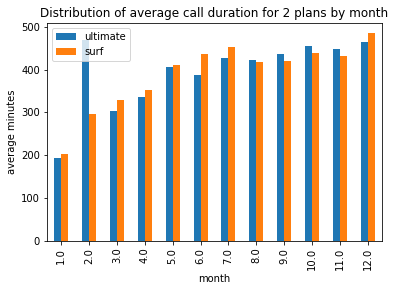

In [29]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plot to visualize it.
total_minutes_ultimate = merged_df[merged_df['plan']=='ultimate']
avg_minutes_ultimate = total_minutes_ultimate.groupby('month')['minutes'].mean()

total_minutes_surf = merged_df[merged_df['plan']=='surf']
avg_minutes_surf = total_minutes_surf.groupby('month')['minutes'].mean()

avg_minutes = pd.merge(avg_minutes_ultimate, avg_minutes_surf, on='month',how='outer').reset_index()
avg_minutes = avg_minutes.rename(columns={'minutes_x':'ultimate','minutes_y':'surf'})
avg_minutes.plot(kind='bar',
                 x='month',
                 title='Distribution of average call duration for 2 plans by month',
                 ylabel='average minutes')
plt.show()

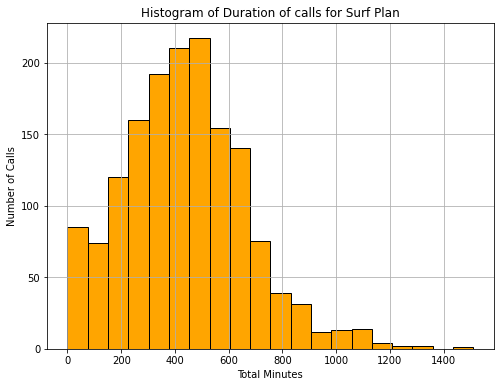

In [30]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.
ultimate_df = merged_df[merged_df['plan'] == 'ultimate']
surf_df = merged_df[merged_df['plan']=='surf']

#surf plan 
plt.figure(figsize=(8,6))
plt.hist(surf_df['minutes'],bins=20,color='orange',edgecolor='black')
plt.grid(True)
plt.title('Histogram of Duration of calls for Surf Plan')
plt.xlabel('Total Minutes')
plt.ylabel('Number of Calls')
plt.show()


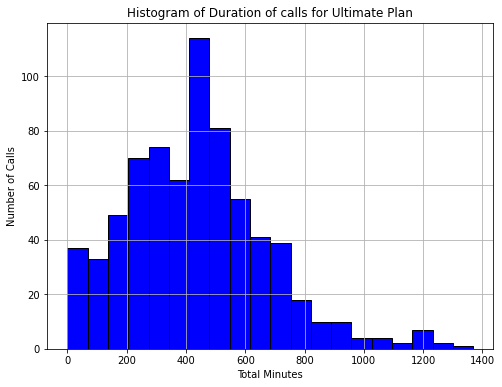

In [31]:
#Ultimate Plan
plt.figure(figsize=(8,6))
plt.hist(ultimate_df['minutes'],bins=20,color='blue',edgecolor='black')
plt.grid(True)
plt.title('Histogram of Duration of calls for Ultimate Plan')
plt.xlabel('Total Minutes')
plt.ylabel('Number of Calls')
plt.show()

In [32]:
# Calculate the mean and the variance of the monthly call duration
var_monthly = merged_df.pivot_table(index='plan', columns='month', values='minutes', aggfunc='var')
display(var_monthly)
mean_monthly = merged_df.pivot_table(index='plan', columns='month',values='minutes',aggfunc='mean')
display(mean_monthly)



month,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
plan,,,,,,,,,,,,
surf,15842.000000,52226.500000,35809.363636,50866.743265,56938.779459,44094.061404,59802.012325,52122.749224,44579.912538,49326.952306,48748.787108,59882.373385
ultimate,16572.333333,54345.066667,61984.931818,34888.928571,43841.046798,37902.570707,72563.374635,53645.506640,57070.464569,52811.566484,59479.782603,60461.924270


month,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
plan,,,,,,,,,,,,
surf,203.0,297.000000,330.00,351.540000,410.240000,435.791667,453.733333,417.849057,420.732984,438.991379,432.494585,484.501608
ultimate,193.5,470.333333,304.25,336.857143,406.241379,387.444444,427.067797,421.436620,437.511628,455.028571,448.730159,465.261745


The first pivot table shown above calculates the variance of call duration per month for each plan. The second pivot table shown calculates the average duration of calls each month for each plan. 

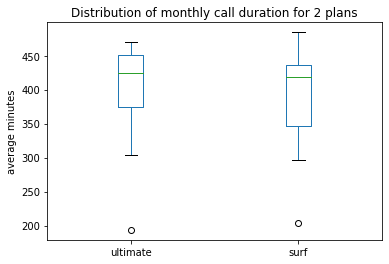

In [33]:
# Plot a boxplot to visualize the distribution of the monthly call duration
avg_minutes.plot(kind='box',
                 x='month',
                 title='Distribution of monthly call duration for 2 plans',
                 ylabel='average minutes')
plt.show()


Based on the graphs shown above, it seems that there is not too much difference in the calling habits of surf and ultimate plan users.  We can see that the only month with a major diffence between the two was February. The surf plan has a slightly wider range between its lowest month and highest month than the ultimate plan does. The means of both plans are very similar, and they both have a negative skew implying the mean is less than the median. 

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №3__

Now correct)

### Messages

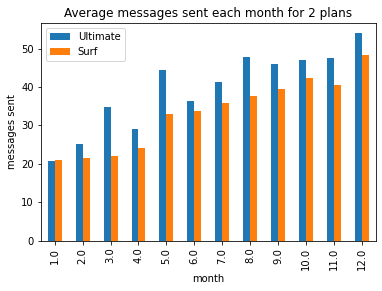

In [34]:
# Compare the number of messages users of each plan tend to send each month
# Filter for the 'ultimate' plan and calculate the mean messages sent per month
messages_ultimate = merged_df[merged_df['plan']=="ultimate"]
mean_messages_ultimate = messages_ultimate.groupby('month')['messages_sent'].mean()

# Filter for the 'surf' plan and calculate the mean messages sent per month
messages_surf = merged_df[merged_df['plan']=="surf"]
mean_messages_surf = messages_surf.groupby('month')['messages_sent'].mean()

# Convert series to dataframes
df_mean_messages = pd.DataFrame({
    'Ultimate': mean_messages_ultimate,
    'Surf': mean_messages_surf
}).reset_index()

df_mean_messages.plot(kind='bar',
                     x='month',
                     title='Average messages sent each month for 2 plans',
                     ylabel='messages sent')
plt.show()



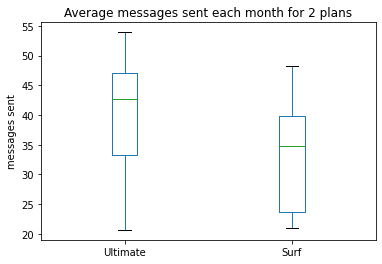

In [35]:
df_mean_messages.plot(kind='box',
                     x='month',
                     title='Average messages sent each month for 2 plans',
                     ylabel='messages sent')
plt.show()

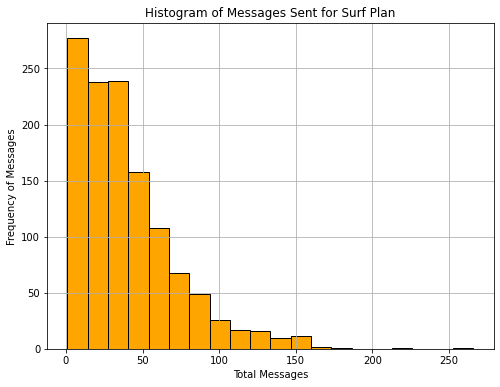

In [36]:
#surf plan 
plt.figure(figsize=(8,6))
plt.hist(surf_df['messages_sent'],bins=20,color='orange',edgecolor='black')
plt.grid(True)
plt.title('Histogram of Messages Sent for Surf Plan')
plt.xlabel('Total Messages')
plt.ylabel('Frequency of Messages')
plt.show()


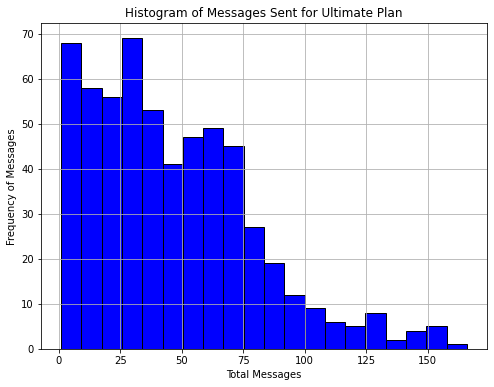

In [37]:
#ultimate plan 
plt.figure(figsize=(8,6))
plt.hist(ultimate_df['messages_sent'],bins=20,color='blue',edgecolor='black')
plt.grid(True)
plt.title('Histogram of Messages Sent for Ultimate Plan')
plt.xlabel('Total Messages')
plt.ylabel('Frequency of Messages')
plt.show()

Customers with the Ultimate plan generally tend to send more messages than those with the Surf plan. As we can see, the mean for Ultimate is roughly 10 messages more than the mean for Surf. That being said, both plans have a similar negative skew, indicating that the mean is less than the median. 

### Internet

In [38]:
# Compare the amount of internet traffic consumed by users per plan


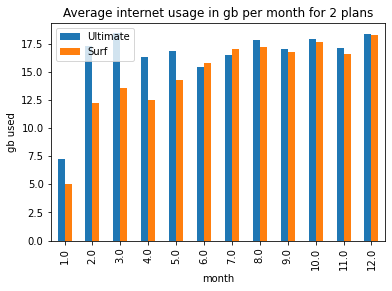

In [39]:
# Filter for the 'ultimate' plan and calculate the mean internet usage per month
internet_ultimate = merged_df[merged_df['plan']=="ultimate"]
mean_internet_ultimate = internet_ultimate.groupby('month')['gb_rounded'].mean()

# Filter for the 'surf' plan and calculate the mean internet usage per month
internet_surf = merged_df[merged_df['plan']=="surf"]
mean_internet_surf = internet_surf.groupby('month')['gb_rounded'].mean()

# Convert series to dataframes
df_mean_internet = pd.DataFrame({
    'Ultimate': mean_internet_ultimate,
    'Surf': mean_internet_surf
}).reset_index()

df_mean_internet.plot(kind='bar',
                     x='month',
                     title='Average internet usage in gb per month for 2 plans',
                     ylabel='gb used')
plt.show()


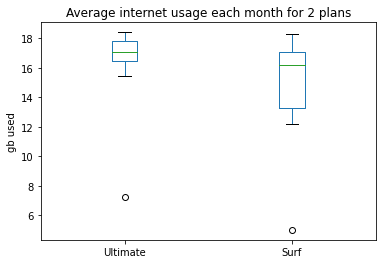

In [40]:
df_mean_internet.plot(kind='box',
                     x='month',
                     title='Average internet usage each month for 2 plans',
                     ylabel='gb used')
plt.show()

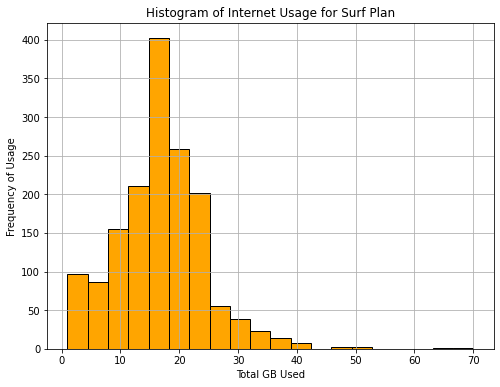

In [41]:
#surf plan 
plt.figure(figsize=(8,6))
plt.hist(surf_df['gb_rounded'],bins=20,color='orange',edgecolor='black')
plt.grid(True)
plt.title('Histogram of Internet Usage for Surf Plan')
plt.xlabel('Total GB Used')
plt.ylabel('Frequency of Usage')
plt.show()

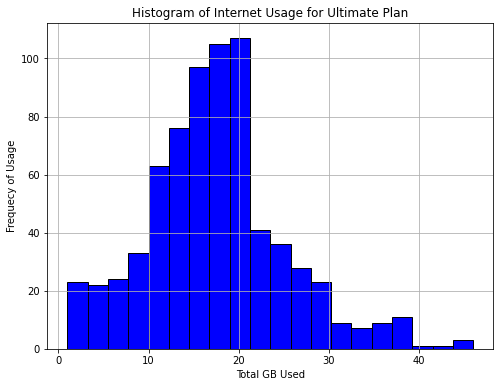

In [42]:
#ultimate plan 
plt.figure(figsize=(8,6))
plt.hist(ultimate_df['gb_rounded'],bins=20,color='blue',edgecolor='black')
plt.grid(True)
plt.title('Histogram of Internet Usage for Ultimate Plan')
plt.xlabel('Total GB Used')
plt.ylabel('Frequecy of Usage')
plt.show()

Customers with Ultimate plans almost always use more internet data than those with Surf plans. The only times customers with Surf plans use more are during June and July. Perhaps there are many students on the Surf plan, and they spend their extra free time in the summer months using more of their internet data. We also see that the Ultimate plan internet usage has a relatively normal distribution, whereas the Surf plan is negatively skewed. 

## Revenue

In [43]:
# Filter for the 'ultimate' plan and calculate the total and mean revenue per month
revenue_ultimate = merged_df[merged_df['plan']=="ultimate"]
total_revenue_ultimate = revenue_ultimate.groupby('month')['revenue'].sum()
mean_revenue_ultimate = revenue_ultimate.groupby('month')['revenue'].mean()

# Filter for the 'surf' plan and calculate the total and mean revenue per month
revenue_surf = merged_df[merged_df['plan']=="surf"]
total_revenue_surf = revenue_surf.groupby('month')['revenue'].sum()
mean_revenue_surf = revenue_surf.groupby('month')['revenue'].mean()
#combine the series into a df

df_total_revenue = pd.DataFrame({
    'Ultimate': total_revenue_ultimate,
    'Surf': total_revenue_surf
}).reset_index()

df_mean_revenue = pd.DataFrame({
    'Ultimate': mean_revenue_ultimate,
    'Surf': mean_revenue_surf
}).reset_index()




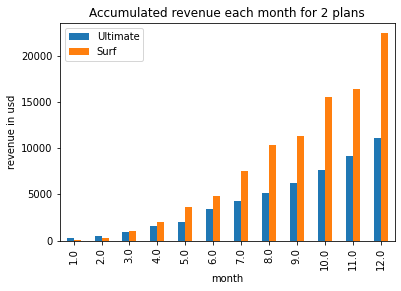

In [44]:
df_total_revenue.plot(kind='bar',
                     x='month',
                     title='Accumulated revenue each month for 2 plans',
                    ylabel='revenue in usd')
plt.show()

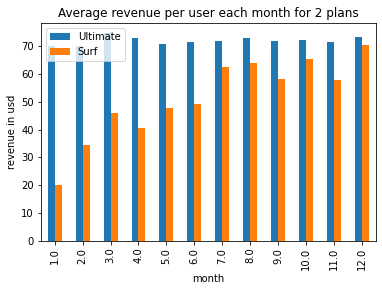

In [45]:
df_mean_revenue.plot(kind='bar',
                    x='month',
                    title='Average revenue per user each month for 2 plans',
                    ylabel='revenue in usd')
plt.show()

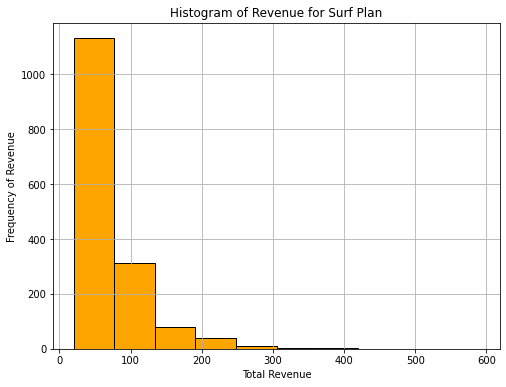

In [46]:
#surf plan 
plt.figure(figsize=(8,6))
plt.hist(surf_df['revenue'],bins=10,color='orange',edgecolor='black')
plt.grid(True)
plt.title('Histogram of Revenue for Surf Plan')
plt.xlabel('Total Revenue')
plt.ylabel('Frequency of Revenue')
plt.show()


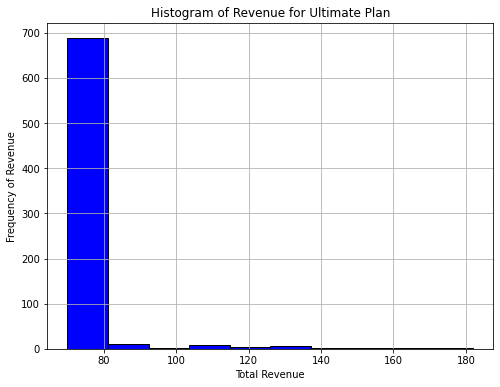

In [47]:
#ultimate plan 
plt.figure(figsize=(8,6))
plt.hist(ultimate_df['revenue'],bins=10,color='blue',edgecolor='black')
plt.grid(True)
plt.title('Histogram of Revenue for Ultimate Plan')
plt.xlabel('Total Revenue')
plt.ylabel('Frequency of Revenue')
plt.show()

The first bar graph shows us the progression of revenue generated by each plan as the months go on. As we can see, the revenue generated by the Surf plan surpasses the revenue generated by the Ultimate plan by March. By the end of the year, the Surf plan generates more than double the revenue that the Ultimate plan generate.
The second graph shows us the average revenue per user each month. What this shows us is that on average, Megalink makes more from one individual Ultimate customer than they do from an individual Surf customer. When you compare the 2 graphs, we can come to the conlcusion that there are significantly more Surf customers than there are Ultimate customers.

## Test statistical hypotheses

The Ho for this experiment is that there is no difference in the average revenue of Surf and Ultimate plans. The H1 is that there is a noticeable difference in the average revenue of Surf and Ultimate plans. 

In [48]:
# Test the hypotheses that the average revenue from users of the Ultimate and Surf calling plans differs
surf_sample = df_mean_revenue['Surf']
ultimate_sample = df_mean_revenue['Ultimate']

alpha = .05

results = st.ttest_ind(surf_sample, ultimate_sample, equal_var=False)

print('p-value:',results.pvalue)
if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 0.0004970238953490146
We reject the null hypothesis


After testing the hypothesis, we see that we reject the null hypothesis. The null hypothesis in this scenario is that there is no diffence in the average revenue of Surf and Ultimate plans. Because we reject this, we can assume that there is indeed a noticeable difference in the average revenue Surf and Ultimate plans.

In [49]:
# Test the hypotheses that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.
#Ho is there is no difference in average revenue based on geographic location
#H1 is that there is a noticeable difference in revenue based on geographic location. 
revenue_NY_NJ = merged_df[merged_df['city'].str.contains('NY-NJ')]
revenue_NY_NJ = revenue_NY_NJ['revenue']

revenue_else = merged_df[~merged_df['city'].str.contains('NY-NJ')]
revenue_else = revenue_else['revenue']

alpha = .05

results = st.ttest_ind(revenue_NY_NJ, revenue_else)

print('p-value:',results.pvalue)
if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")


p-value: 0.049745282774076104
We reject the null hypothesis


The null hypothesis in this scenario is that there is no noticeable difference in the average revevnue from users in NY-NJ in comparison to all other regions. After testing the hypothesis, we see that we reject the null hypothesis. This would indicate that there is a noticeable difference in average revenue based on geographical location. 

## General conclusion

In this project we have learned a lot about Megaline and their customers. First, we saw that customers with Surf and Ultimate plans have similar calling habits. The duration of calls for both customer bases were very similar in all but one month, February.  Moving on to messages, we see that on average Ultimate customers send 10 more messages per month than Surf customers. This would make sense as Ultimate customers have 20x more text messages included in their plan. In terms of internet usage, we see that for the first few months of the year that Ultimate customers use far more internet data than Surf customers. However, from June until the end of the year we see an uptick in Surf customers internet usage, and is pretty in line with Ultimate customers usage. Lastly, when looking at revenue we see that although the average revenue per user is higher amongst Ultimate customers, the total revenue brought in from Surf customers in a year is more than double the revenue from Ultimate customers in a year. This would suggest that far more customers have the Surf plan, and that they should shift their advertising budget to advertise the Surf plan more.